# CORE_SET demo: cyclic-only macrocycles → new reference construction (X, X_open) + plots
This notebook:
1) Takes the **cyclic SMILES** in `CORE_SET` (ignores the provided `ref_smiles`).
2) For a chosen set of cut bonds `b`, constructs **M, M_open, X, X_open** using the **new local-reference method**:
   - `M` = full macrocycle
   - `M_open` = cut bond + cap ends
   - `X` = induced subgraph within `ref_radius` bonds of the cut atoms (local environment)
   - `X_open` = same cut performed inside X + caps
3) Plots the graph connectivity for **M/M_open/X/X_open** (RDKit connectivity → NetworkX).
4) Optionally generates ETKDG conformers, MMFF-ranks, and saves top-m XYZ frames for each species.

Outputs:
- `ring_strain_outputs_core_set/<name>/bondXXX/{M,M_open,X,X_open}_top*.xyz`
- `ring_strain_outputs_core_set/manifest.json`


In [1]:
import rdkit
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt
print('RDKit', rdkit.__version__)
print('NetworkX', nx.__version__)


RDKit 2025.09.3
NetworkX 3.6.1


In [2]:
import ring_strain_graph_fix as rs
from pathlib import Path
import json
print('Loaded:', rs.__file__)


Loaded: /home/thomas-watts/Desktop/pyLIQTR/ring_strain/ring_strain_graph_fix.py


## 1) Define CORE_SET (cyclic-only used)

In [3]:
CORE_SET = [
  {
    'name': 'CP1',
    'cyc_smiles': (
      'CC1=C([N+]([O-])=O)C(OC(CNC([C@@H](NC([C@@H](NC(COCCOCCOCCNC2=O)=O)'
      'C(C)C)=O)C)=O)=O)=C(C(C)(C2)C)C(C)=C1'
    )
  },
  {
    'name': 'CP2',
    'cyc_smiles': (
      'CC1=C([N+]([O-])=O)C(OC(CNC([C@@H](NC([C@@H](NC(COCCOCCOCCNC2=O)=O)'
      'CN=[N+]=[N-])=O)CN=[N+]=[N-])=O)=O)=C(C(C)(C2)C)C(C)=C1'
    )
  },
  {
    'name': 'CP3',
    'cyc_smiles': (
      'CC1=C([N+]([O-])=O)C(OC(CNC([C@@H](NC([C@@H](NC(COCCOCCOCCNC2=O)=O)'
      'CN3N=NC(OC[C@@H]4[C@H]([C@@H]([C@H]([C@H](O4)O)O)O)O[C@@H]'
      '([C@@H]([C@H]([C@H]5O)O)O)O[C@@H]5CO)=C3)=O)CN6N=NC(OC[C@@H]7'
      '[C@H]([C@@H]([C@H]([C@H](O7)O)O)O)O[C@@H]([C@@H]([C@H]([C@H]8O)'
      'O)O)O[C@@H]8CO)=C6)=O)=O)=C(C(C)(C2)C)C(C)=C1'
    )
  },
  {
    'name': 'CP4',
    'cyc_smiles': (
      'CC1=C([N+]([O-])=O)C(OC(CNC([C@@H](NC([C@@H](NC(COCCOCCOCCNCC2)=O)'
      'CN=[N+]=[N-])=O)C)=O)=O)=C(C2(C)C)C(C)=C1'
    )
  },
  {
    'name': 'CP5',
    'cyc_smiles': (
      'CC1=C([N+]([O-])=O)C(OC(CNC([C@@H](NC([C@@H](NC(COCCOCCOCCNC2=O)=O)'
      'CN3N=NC(OC[C@@H]4[C@H]([C@@H]([C@H]([C@H](O4)O)O)O)O[C@@H]'
      '([C@@H]([C@H]([C@H]5O)O)O)O[C@@H]5CO)=C3)=O)C)=O)=O)=C(C(C)(C2)'
      'C)C(C)=C1'
    )
  },
]

print('CORE_SET entries:', len(CORE_SET))


CORE_SET entries: 5


## 2) Settings: how many bonds to try, how big the local reference X is

In [7]:
BONDS_PER_MOL = 20   # try 1–3 for these large molecules
ref_radius = 5     # macrocycles often need 3–4

# Conformer generation (optional)
DO_CONFORMERS = True
num_confs = 40
top_m = 5
window = 8.0


## 3) Helper: choose candidate bonds robustly (fallbacks if ring perception is tricky)

In [8]:
def get_candidate_bonds_robust(mol: Chem.Mol):
    cand = rs.list_candidate_cut_bonds(mol, allow_aromatic=False, allow_multiple=False, avoid_shared_ring_bonds=True)
    if cand:
        return cand
    cand = rs.list_candidate_cut_bonds(mol, allow_aromatic=False, allow_multiple=False, avoid_shared_ring_bonds=False)
    if cand:
        return cand
    cand = rs.list_candidate_cut_bonds(mol, allow_aromatic=True, allow_multiple=False, avoid_shared_ring_bonds=False)
    return cand


## 4) Loop CORE_SET: build M/M_open/X/X_open from cyclic SMILES and plot


CP1
  candidate bonds: 26
  bonds_to_try: [6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 41, 47]

  bond 006
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C17H23N3O6
    X_open formula = C17H25N3O6


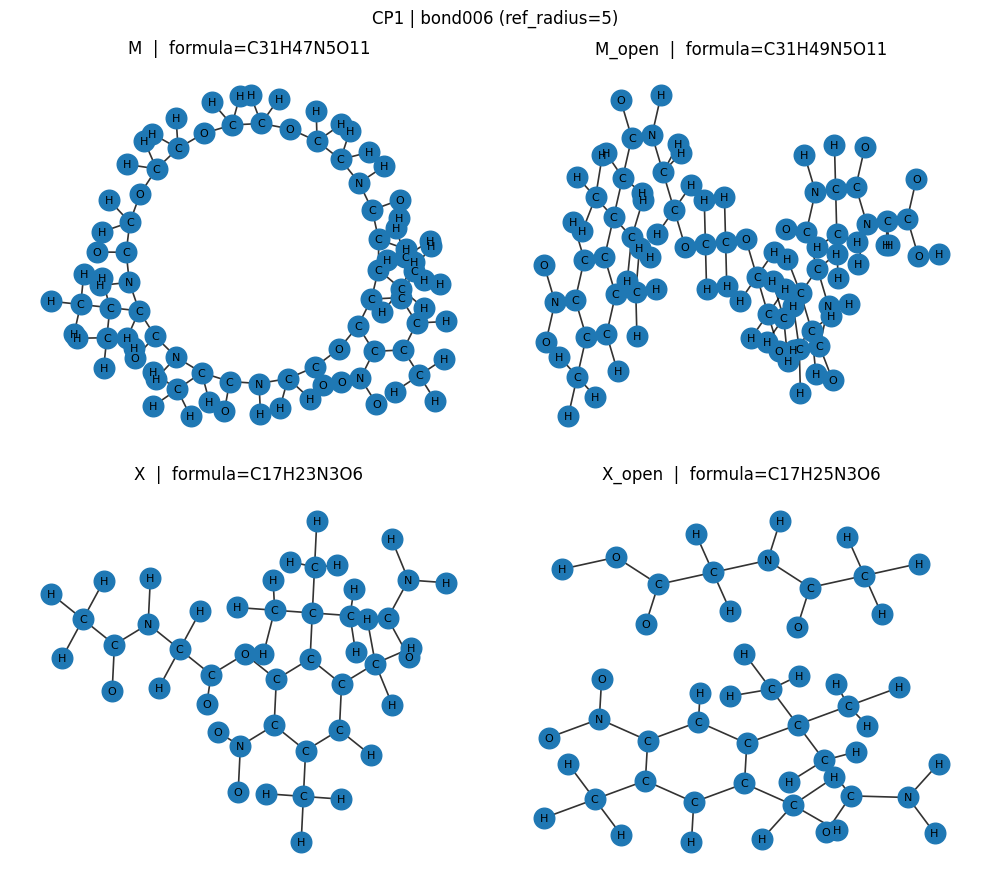

    wrote ring_strain_outputs_core_set_test/CP1/bond006/M_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond006/M_open_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond006/X_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond006/X_open_top5.xyz

  bond 007
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C18H27N3O5
    X_open formula = C18H29N3O5


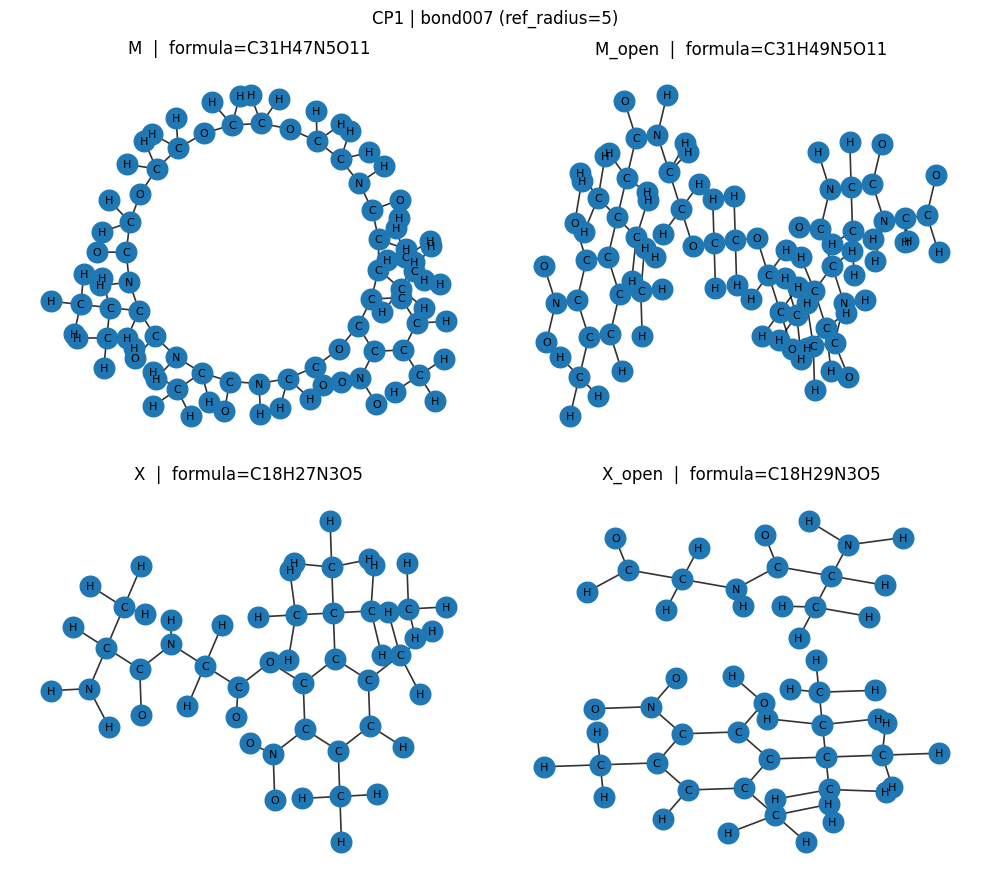

    wrote ring_strain_outputs_core_set_test/CP1/bond007/M_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond007/M_open_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond007/X_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond007/X_open_top5.xyz
Bond 9 not valid.
Bond 10 not valid.
Bond 11 not valid.

  bond 013
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C12H23N3O4
    X_open formula = C12H25N3O4


[15:08:14] non-ring atom 0 marked aromatic
[15:08:14] non-ring atom 0 marked aromatic
[15:08:14] non-ring atom 0 marked aromatic


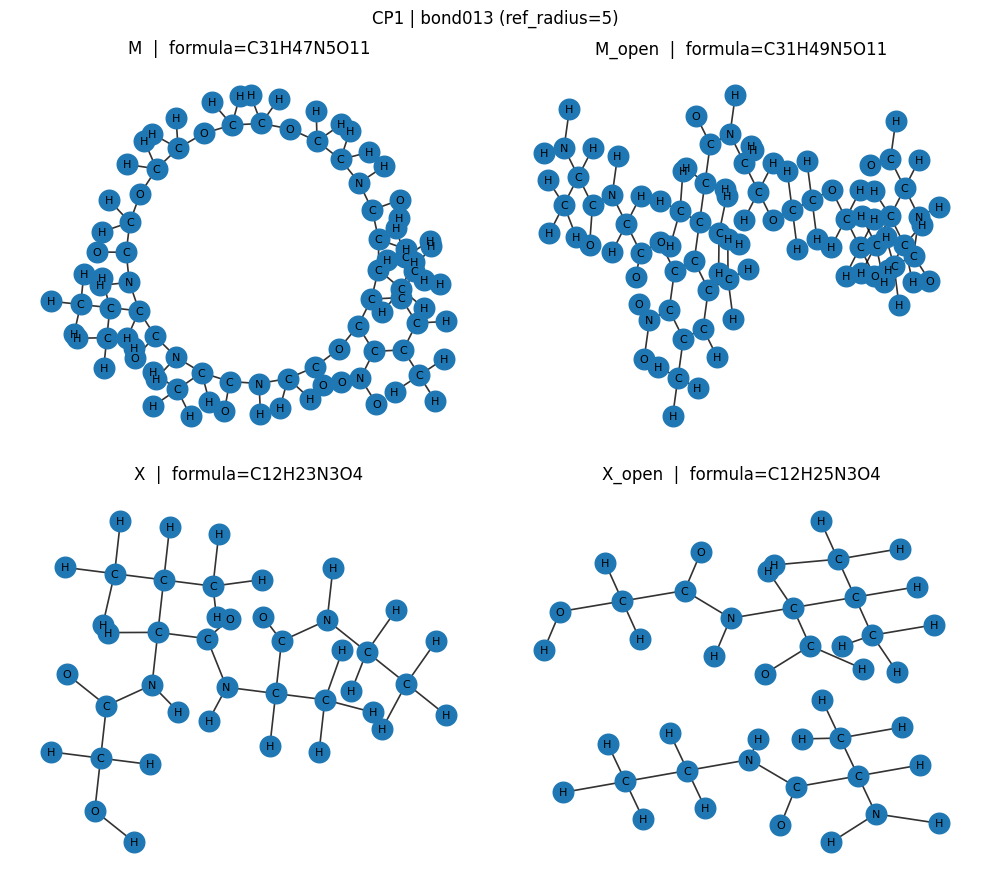

    wrote ring_strain_outputs_core_set_test/CP1/bond013/M_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond013/M_open_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond013/X_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond013/X_open_top5.xyz

  bond 014
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C12H23N3O4
    X_open formula = C12H25N3O4


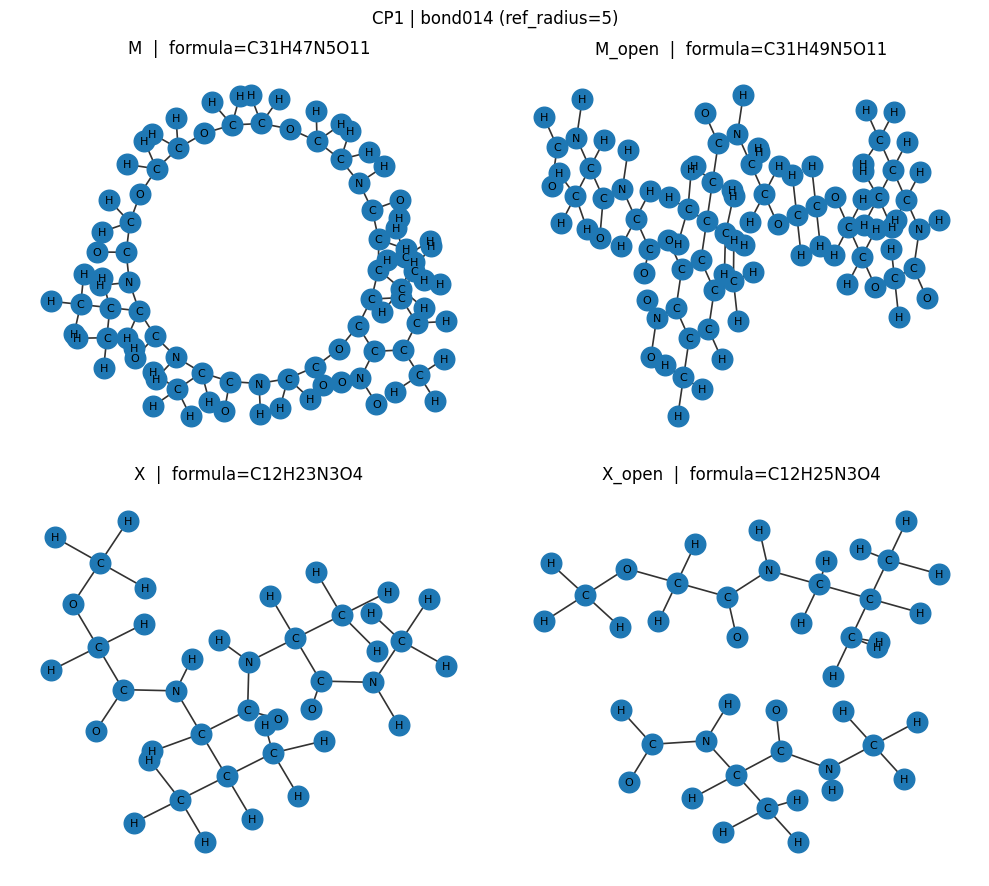

    wrote ring_strain_outputs_core_set_test/CP1/bond014/M_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond014/M_open_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond014/X_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond014/X_open_top5.xyz

  bond 015
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C12H23N3O4
    X_open formula = C12H25N3O4


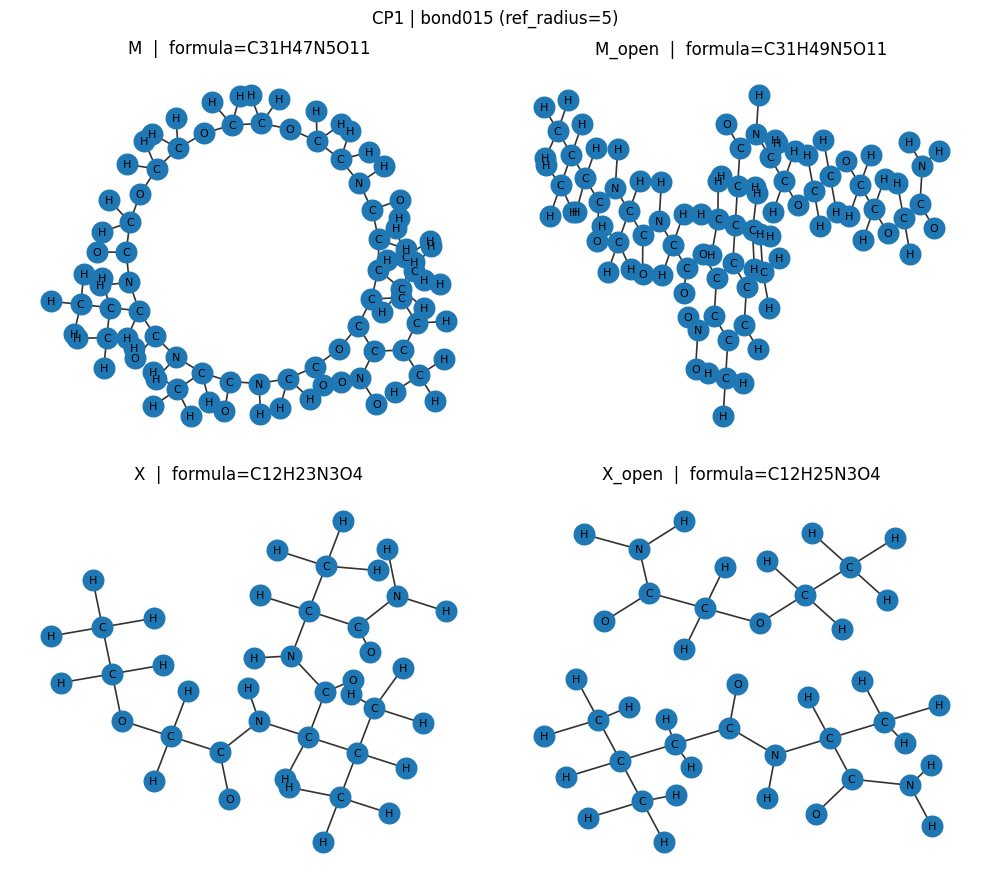

    wrote ring_strain_outputs_core_set_test/CP1/bond015/M_top4.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond015/M_open_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond015/X_top5.xyz
    wrote ring_strain_outputs_core_set_test/CP1/bond015/X_open_top5.xyz

  bond 017
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C11H22N2O4
    X_open formula = C11H24N2O4


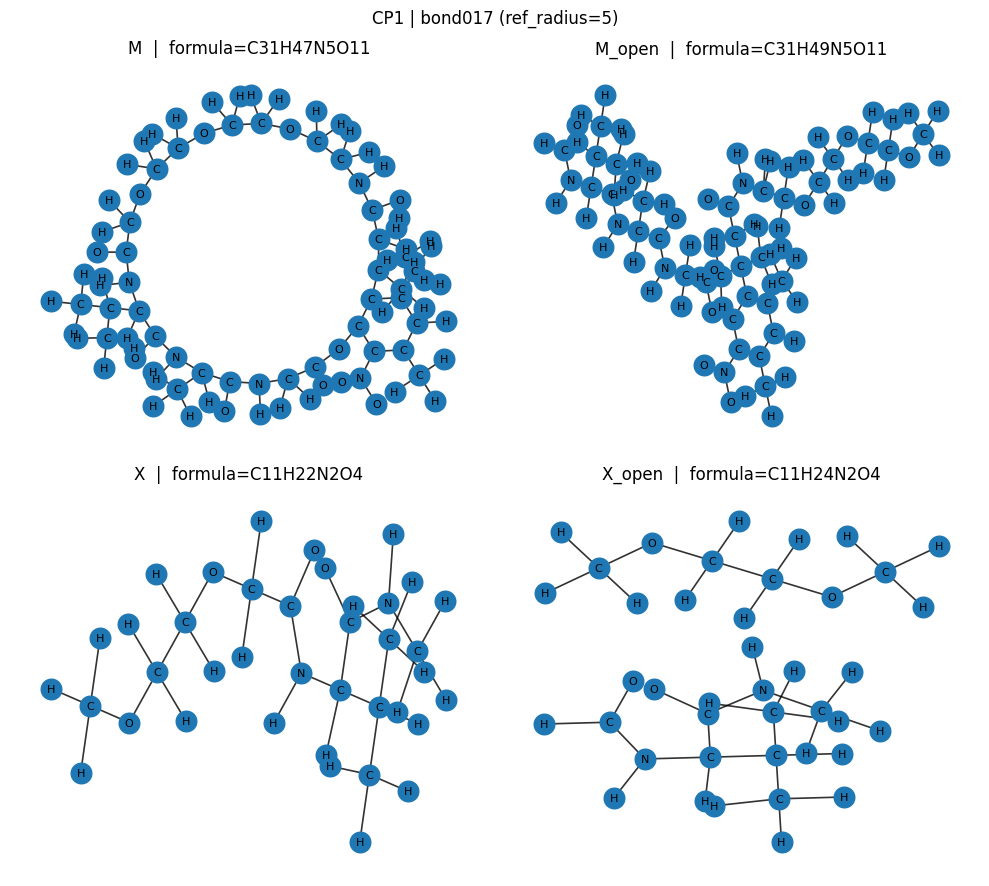

    wrote ring_strain_outputs_core_set_test/CP1/bond017/M_top5.xyz


[15:09:46] Interrupted, cancelling conformer generation


Bond 17 not valid.

  bond 018
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C11H22N2O4
    X_open formula = C11H24N2O4


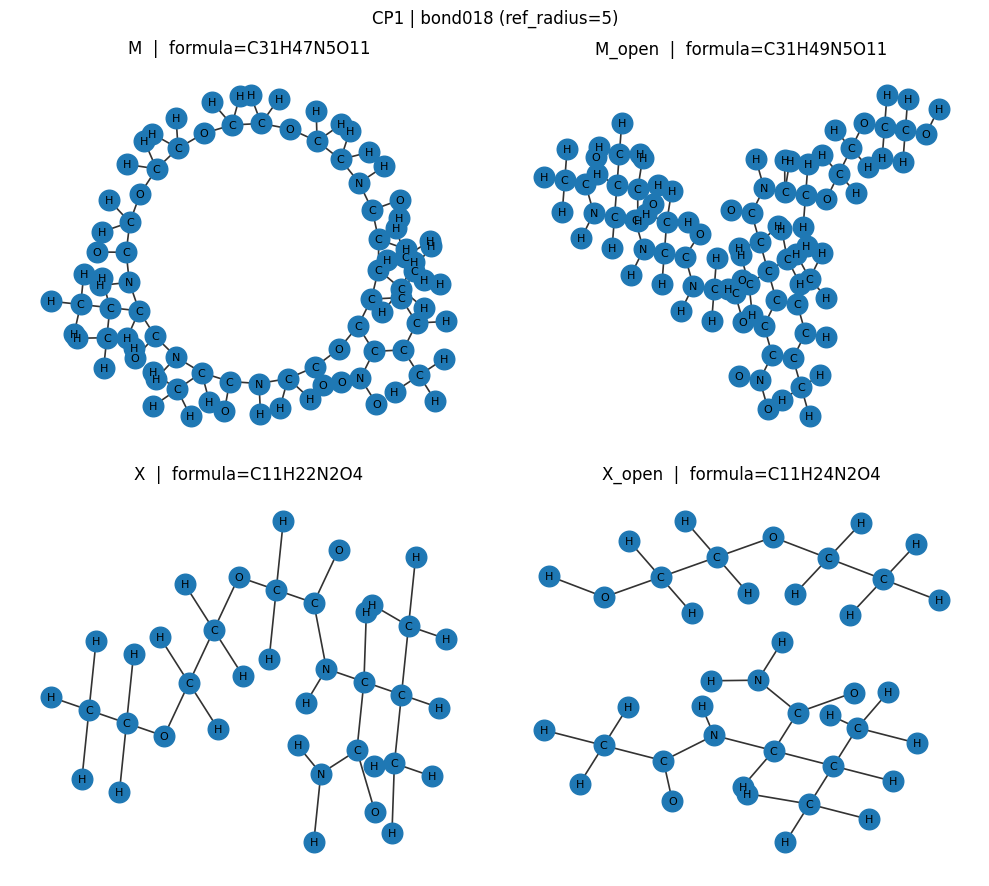

Bond 18 not valid.

  bond 019
    M      formula = C31H47N5O11
    M_open formula = C31H49N5O11
    X      formula = C9H19NO4
    X_open formula = C9H21NO4


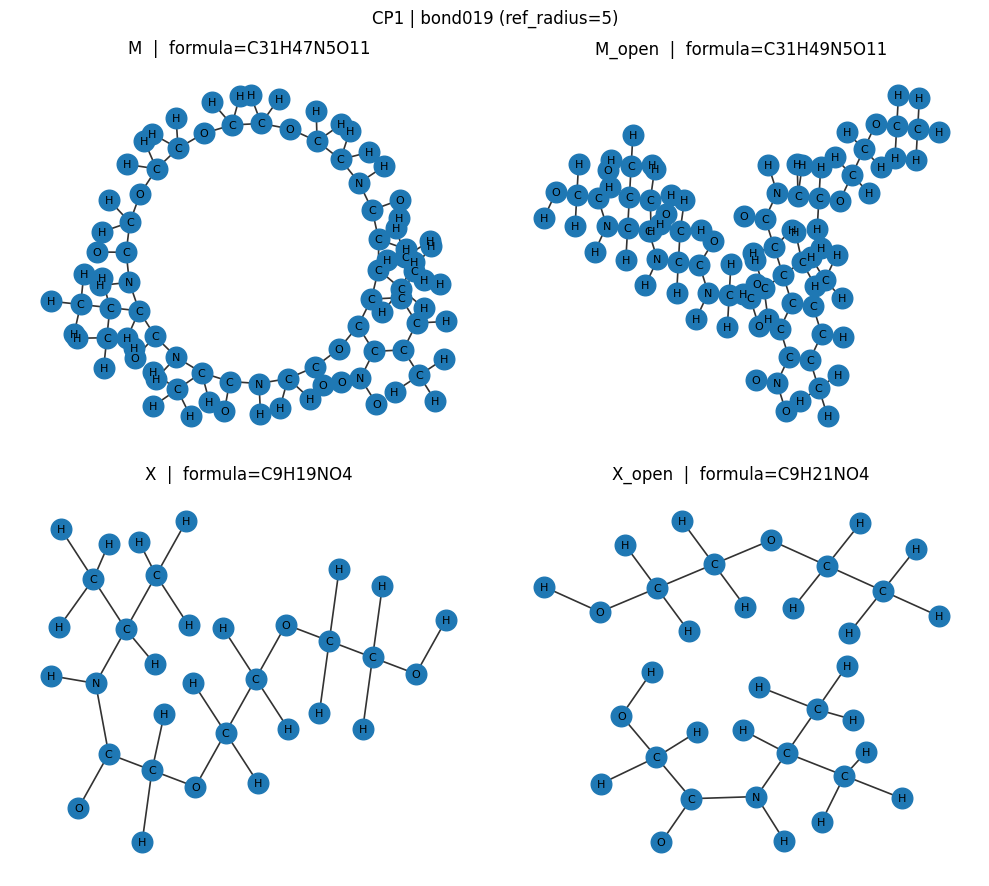

In [ ]:
out_root = Path('ring_strain_outputs_core_set_test')
out_root.mkdir(exist_ok=True)
manifest = []

for item in [CORE_SET[0]]:
    name = item['name']
    smi = item['cyc_smiles']
    print('\n' + '='*80)
    print(name)

    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print('  !! RDKit failed to parse cyclic SMILES')
        continue
    Chem.SanitizeMol(mol)

    cand = get_candidate_bonds_robust(mol)
    print('  candidate bonds:', len(cand))
    if not cand:
        print('  !! no ring bonds found by heuristics; skipping')
        continue

    bonds_to_try = rs.choose_subset_bonds_evenly(cand, k=min(BONDS_PER_MOL, len(cand)))
    print('  bonds_to_try:', bonds_to_try)

    for b in bonds_to_try:
        try:
            sp = rs.build_structures(smi, bond_idx=b, ref_radius=ref_radius, cap='H')
            print(f'\n  bond {b:03d}')
            for sname in ['M','M_open','X','X_open']:
                print(f"    {sname:6s} formula = {rs.mol_formula(sp[sname])}")

            rs.plot_species_grid(sp, title=f"{name} | bond{b:03d} (ref_radius={ref_radius})")

            entry = {
                'name': name,
                'cyc_smiles': smi,
                'bond_idx': int(b),
                'ref_radius': int(ref_radius),
                'species': {}
            }

            if DO_CONFORMERS:
                out_dir = out_root / name / f"bond{b:03d}"
                out_dir.mkdir(parents=True, exist_ok=True)

                for sname in ['M','M_open','X','X_open']:
                    mol3d, ranked = rs.embed_mmff_rank(sp[sname], num_confs=num_confs, seed=0xC0FFEE + 17*b + (13 if sname=='X_open' else 0))
                    keep = rs.choose_top_m(ranked, top_m=top_m, window=window)
                    xyz_path = out_dir / f"{sname}_top{len(keep)}.xyz"
                    rs.write_xyz_multiframe(mol3d, keep, str(xyz_path), comment_prefix=f"{name} {sname} MMFF-ranked")
                    entry['species'][sname] = {
                        'xyz': str(xyz_path),
                        'n_confs': int(len(keep)),
                        'mmff_e0': float(ranked[0].mmff_energy),
                        'formula': rs.mol_formula(sp[sname])
                    }
                    print('    wrote', xyz_path)

            manifest.append(entry)
        except:
            print(f"Bond {b} not valid.")

manifest_path = out_root / 'manifest.json'
manifest_path.write_text(json.dumps(manifest, indent=2))
print('\nWrote manifest:', manifest_path.resolve())
print('Total entries saved:', len(manifest))
